## 1.1 data postnl

In [24]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.patches as mpatches
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#import data
df_postnl=pd.read_csv('/datc/parcel/notebooks/data/postnl/20201014_300_klanten.csv', parse_dates=[0])

#postnl data manipuleren
#klant 153 eruit filteren
cust_filter = df_postnl['cust_id'] == 'klant_153'
df_filter = df_postnl['procesdag'].dt.dayofweek <= 7
data_153 = df_postnl.where(df_filter & cust_filter).dropna()

#alleen de eerste dag van de laatste 3 maanden
df_153 = data_153.where(data_153['procesdag'].dt.month  >= 10).dropna()
df_153 = df_153.where(df_153['procesdag'].dt.day == 1).dropna()
df_153

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column
70767,2015-10-01,klant_153,6024.0,4687.0,train
78827,2015-11-01,klant_153,3481.0,6651.0,train
86627,2015-12-01,klant_153,2641.0,4755.0,train
165927,2016-10-01,klant_153,0.0,4806.0,train
173987,2016-11-01,klant_153,5181.0,4042.0,train
181787,2016-12-01,klant_153,5695.0,5659.0,train
260827,2017-10-01,klant_153,3854.0,6041.0,train
268887,2017-11-01,klant_153,4545.0,6513.0,train
276687,2017-12-01,klant_153,5886.0,0.0,train
355727,2018-10-01,klant_153,4523.0,6492.0,train


## 1.2 google trends data

In [2]:
# Import packages google trends
from pytrends.request import TrendReq
pytrend = TrendReq(hl='en-US', tz=360)

In [3]:
# Create list with keywords
kw_list = ['coolblue', 'bol.com']

# Create payload
pytrend.build_payload(kw_list, timeframe='2015-01-02 2020-04-29', geo='NL')

# Get interest over time, in a dataframe and reset it's index
interest = pytrend.interest_over_time().reset_index()

# Select every row, where the date falls in Q4 and drop all rows with NaN values
q4_interest = interest.where(interest['date'].dt.month  >= 10).dropna()
q4_interest

,date,coolblue,bol.com,isPartial
8,2015-10-01,23.0,49.0,0.0
9,2015-11-01,26.0,75.0,0.0
10,2015-12-01,33.0,79.0,0.0
20,2016-10-01,25.0,49.0,0.0
21,2016-11-01,30.0,65.0,0.0
22,2016-12-01,34.0,66.0,0.0
32,2017-10-01,33.0,53.0,0.0
33,2017-11-01,40.0,78.0,0.0
34,2017-12-01,40.0,81.0,0.0
44,2018-10-01,30.0,58.0,0.0


In [5]:
#manipuleren van data
q4_int = q4_interest.rename(columns={'date': 'procesdag'})
q4_int

,procesdag,coolblue,bol.com,isPartial
8,2015-10-01,23.0,49.0,0.0
9,2015-11-01,26.0,75.0,0.0
10,2015-12-01,33.0,79.0,0.0
20,2016-10-01,25.0,49.0,0.0
21,2016-11-01,30.0,65.0,0.0
22,2016-12-01,34.0,66.0,0.0
32,2017-10-01,33.0,53.0,0.0
33,2017-11-01,40.0,78.0,0.0
34,2017-12-01,40.0,81.0,0.0
44,2018-10-01,30.0,58.0,0.0


## 1.3 samenvoegen data

In [10]:
#google trends en df_postnl samenvoegen
df_gt_postnl = pd.merge(df_153, q4_int, on='procesdag')
df_gt_postnl

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column,coolblue,bol.com,isPartial
0,2015-10-01,klant_153,6024.0,4687.0,train,23.0,49.0,0.0
1,2015-11-01,klant_153,3481.0,6651.0,train,26.0,75.0,0.0
2,2015-12-01,klant_153,2641.0,4755.0,train,33.0,79.0,0.0
3,2016-10-01,klant_153,0.0,4806.0,train,25.0,49.0,0.0
4,2016-11-01,klant_153,5181.0,4042.0,train,30.0,65.0,0.0
5,2016-12-01,klant_153,5695.0,5659.0,train,34.0,66.0,0.0
6,2017-10-01,klant_153,3854.0,6041.0,train,33.0,53.0,0.0
7,2017-11-01,klant_153,4545.0,6513.0,train,40.0,78.0,0.0
8,2017-12-01,klant_153,5886.0,0.0,train,40.0,81.0,0.0
9,2018-10-01,klant_153,4523.0,6492.0,train,30.0,58.0,0.0


## 1.4 correlatie tussen de twee datasets

In [14]:
#correlatie feestdagen en postnldata
correlation_matrix =df_gt_postnl.corr()
correlation_matrix

,aantal_pakketten,aantal_pakketten_volgende_dag,coolblue,bol.com,isPartial
aantal_pakketten,1.000000,0.009495,0.143570,-0.056168,NaN
aantal_pakketten_volgende_dag,0.009495,1.000000,-0.491048,-0.245658,NaN
coolblue,0.143570,-0.491048,1.000000,0.780360,NaN
bol.com,-0.056168,-0.245658,0.780360,1.000000,NaN
isPartial,NaN,NaN,NaN,NaN,NaN


In [15]:
#conclusie: lijkt geen correlatie hoge tussen google trends en het aantal pakketten te zitten

## 1.5 model

In [16]:
# Filters
from datetime import datetime
train_start = df_gt_postnl['procesdag'] >= datetime(year=2015, month=10, day=1)
train_end = df_gt_postnl['procesdag'] <= datetime(year=2018, month=12, day=1)
test_start = df_gt_postnl['procesdag'] >= datetime(year=2019, month=10, day=1)
test_end = df_gt_postnl['procesdag'] <= datetime(year=2019, month=12, day=1)

# Split train and test
train =  df_gt_postnl.where(train_start & train_end).dropna()
test =  df_gt_postnl.where(test_start & test_end).dropna()

# Define X and Y train
x_train = train[['coolblue', 
                'bol.com']]
y_train = train[['aantal_pakketten']]

# Define X and Y test
x_test = test[['coolblue',
              'bol.com']]
y_test = test[['aantal_pakketten']]

In [17]:
#fit model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [18]:
#make prediction
pred = lr.predict(x_test)

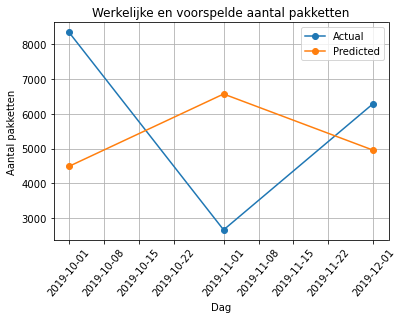

In [19]:
# Plot actual vs. predicted
fig, ax = plt.subplots()
ax.plot(test['procesdag'], y_test, label='Actual', marker='o')
ax.plot(test['procesdag'], pred, label='Predicted', marker='o')
ax.set(
    xlabel='Dag',
    ylabel='Aantal pakketten',
    title='Werkelijke en voorspelde aantal pakketten')
plt.xticks(rotation=50)
plt.grid()
plt.legend()
plt.show()

In [20]:
# Evaluate model
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)

print('Root Mean Squared Error:', rmse)
print('R2 score:', r2)

Root Mean Squared Error: 3262.277047158222
R2 score: -0.9281400193191991


## 1.6 conclusie

In [22]:
#De RMSE is nog erg hoog en de R2 score is ook niet optimaal. Dit model kan wat aanpassingen gebruiken.